In [1]:
import cv2
from matplotlib import pyplot as plt

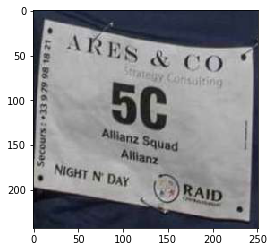

In [2]:
#Chargement de l'image et mise à l'échelle
image = cv2.imread("dossard_raid_2.jpg", 1)
image = cv2.resize(image, (251, 243))
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.show()

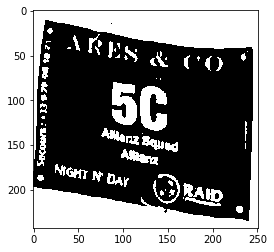

In [3]:
#Seuil sur les valeurs de gris
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
_,thresh = cv2.threshold(gray,130,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh, cmap='gray')
plt.show()

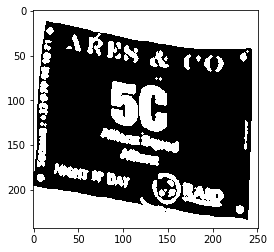

In [4]:
#Dilatation pour améliorer la détection
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
dilated = cv2.dilate(thresh,kernel, iterations = 1)
plt.imshow(dilated, cmap='gray')
plt.show()

In [5]:
#Détection des contours
_, contours, hierarchy = cv2.findContours(dilated,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

In [6]:
#hauteur/largeur min/max des boites pouvant correspondre à des chiffres
h_min=50
h_max=70
w_min=25
w_max=40

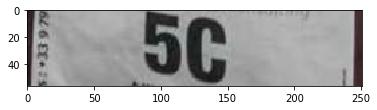

In [7]:
#On cherche les ordonnées y_min et y_max qui encadrent le mieux le numéro du dossard
y_min=image.shape[0]
y_max=0

for contour in contours:
    
    #chaque contour est associé à une boite
    [x,y,w,h] = cv2.boundingRect(contour)
    
    # on ne s'interesse qu'aux boites qui peuvent encadrer des chiffres (d'après hauteur/largeur min/max)
    if h>h_max and w>w_max:
        continue  
    if h<h_min or w<w_min:
        continue

    if y+h>y_max:
        y_max=y+h
    if y<y_min:
        y_min=y

#on découpe le dossard sur une bande entre y_min et y_max contenant le numéro
crop = image[y_min:y_max]
plt.imshow(crop)
plt.show()

In [8]:
#Sauvergarde de l'image
cv2.imwrite("crop.jpg", crop)

True

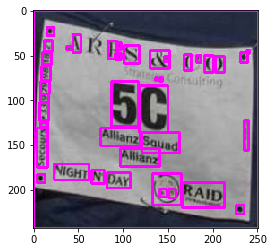

In [9]:
#Toutes les boites détectées
for contour in contours:
    [x,y,w,h] = cv2.boundingRect(contour)
    cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,255),2)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.show()